In [1]:
import numpy as np
import pandas as pd

In [39]:
# Read Data
data =  pd.read_csv('faithful.dat', sep=" ::")

C:\Users\Pavilion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [40]:
# drop description and references rows 
data = data.drop(list(range(0, 14)) + [286, 287])

# rename all data
data.rename(columns={data.columns[0]: "data"} , inplace= True)

# split the colums of data
data = data['data'].str.split('    ', expand=True)
data

,0,1,2
14,1,3.600,79
15,2,1.800,54
16,3,3.333,74
17,4,2.283,62
18,5,4.533,85
...,...,...,...
281,268,4.117,81
282,269,2.150,46
283,270,4.417,90
284,271,1.817,46


In [42]:
# renaming the columns
data.rename(columns={data.columns[0]: "index" , data.columns[1]: "eruptions" , data.columns[2]: "waiting"} , inplace= True)
data = data.reset_index(drop=True)
data

,index,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
267,268,4.117,81
268,269,2.150,46
269,270,4.417,90
270,271,1.817,46


In [46]:
# convert data to numiric values
data['eruptions'] = pd.to_numeric(data['eruptions'])
data['waiting'] = pd.to_numeric(data['waiting'])
x = np.vstack((data['eruptions'], data['waiting'])).T
x

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ],
       [ 2.883, 55.   ],
       [ 4.7  , 88.   ],
       [ 3.6  , 85.   ],
       [ 1.95 , 51.   ],
       [ 4.35 , 85.   ],
       [ 1.833, 54.   ],
       [ 3.917, 84.   ],
       [ 4.2  , 78.   ],
       [ 1.75 , 47.   ],
       [ 4.7  , 83.   ],
       [ 2.167, 52.   ],
       [ 1.75 , 62.   ],
       [ 4.8  , 84.   ],
       [ 1.6  , 52.   ],
       [ 4.25 , 79.   ],
       [ 1.8  , 51.   ],
       [ 1.75 , 47.   ],
       [ 3.45 , 78.   ],
       [ 3.067, 69.   ],
       [ 4.533, 74.   ],
       [ 3.6  , 83.   ],
       [ 1.967, 55.   ],
       [ 4.083, 76.   ],
       [ 3.85 , 78.   ],
       [ 4.433, 79.   ],
       [ 4.3  , 73.   ],
       [ 4.467, 77.   ],
       [ 3.367, 66.   ],
       [ 4.033, 80.   ],
       [ 3.833, 74.   ],
       [ 2.017, 52.   ],
       [ 1.867, 48.   ],
       [ 4.833, 80.   ],
       [ 1.833, 59.   ],
       [ 4.783, 90.   ],


In [91]:
def pca(x, n_components = 2):
    # subtract mean from the datapoints
    x_mean = x - np.mean(x, axis = 0)
    
    # calculate the covariance of matrix
    cov = np.cov(x_mean, rowvar= False)
    
    # calculate eigenvalues and vectors of covariamce matrix 
    eigen_val , eigen_vec = np.linalg.eigh(cov)

    # sort the eigenvalues in descending order
    sorted_ind = np.argsort(eigen_val)[::-1]
    sorted_eigenval = eigen_val[sorted_ind]
    
    # sort the eigenvectors
    sorted_eigenvec = eigen_vec[:, sorted_ind]
    eigenvector_subset = sorted_eigenvec[:, 0:n_components]
    
    # trasform the data
    x_transfomed = np.dot(eigenvector_subset.transpose(), x_mean.transpose()).transpose()

    return sorted_eigenval, sorted_eigenvec, x_transfomed

In [90]:
# call pca fn and print results
sorted_eigenval, sorted_eigenvec, x_transfomed = pca(x)

print('Eien Values: \n', sorted_eigenval, '\nEigen Vectors: \n', sorted_eigenvec, '\nTranformed Data: \n', x_transfomed)

Eien Values: 
 [185.88182394   0.24421674] 
Eigen Vectors: 
 [[ 0.0755118  -0.99714491]
 [ 0.99714491  0.0755118 ]] 
Tranformed Data: 
 [[ 8.08828024e+00  4.99971159e-01]
 [-1.69762637e+01  4.07036971e-01]
 [ 3.08239404e+00  3.88649845e-01]
 [-8.96263224e+00  5.29510387e-01]
 [ 1.41416022e+01  2.27057650e-02]
 [-1.58973395e+01 -5.97359164e-01]
 [ 1.71456474e+01  8.27179681e-02]
 [ 1.40711497e+01  9.53041964e-01]
 [-1.99563717e+01  3.09298315e-02]
 [ 1.41277835e+01  2.05183283e-01]
 [-1.69737718e+01  3.74131189e-01]
 [ 1.30979420e+01  5.61435228e-01]
 [ 7.13644241e+00 -1.73827587e-01]
 [-2.39600537e+01 -7.16883905e-02]
 [ 1.21599229e+01 -2.94841036e-01]
 [-1.89428407e+01 -1.09938813e-01]
 [-9.00288003e+00  1.06098862e+00]
 [ 1.31646189e+01 -3.19043726e-01]
 [-1.89856559e+01  4.55442350e-01]
 [ 8.13736291e+00 -1.48173031e-01]
 [-1.99676984e+01  1.80501568e-01]
 [-2.39600537e+01 -7.16883905e-02]
 [ 7.07980856e+00  5.74031094e-01]
 [-1.92341664e+00  2.76331386e-01]
 [ 3.17300821e+00 -8.079

In [100]:
from sklearn.metrics.pairwise import pairwise_distances

def kMedoids(x, k, maxiter = 100):

    # get shape of the distance matrix D
    D = pairwise_distances(x, metric='euclidean')
    m, n = D.shape

    # determine set of valid initial cluster medoid index
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])

    # shuffle rows and coloumns to keep the first duplicate below
    rows,columns = np.where(D == 0)
    index_shuf = list(range(len(rows)))
    np.random.shuffle(index_shuf)
    rows = rows[index_shuf]
    columns = columns[index_shuf]
    for r,c in zip(rows,columns):
        # if two points with a distance of 0, then add the first one to cluster 
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    # initialize randomly array of k medoids index 
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # copy the array
    Mnew = np.copy(M)

    # initialize dict to build clusters
    C = {}
    for a in range(maxiter):

        # determine clusters
        J = np.argmin(D[:, M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J == kappa)[0]

        # update medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa], C[kappa])], axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]

        np.sort(Mnew)
        
        # check if both arrays are the same no more changes needed
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # update clusters
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    return M, C

In [102]:
from sklearn.metrics.pairwise import euclidean_distances

# get the euclidean distance between the rows of data x
D = euclidean_distances(x, x)

# split the datapoints to create 2 clusters by k medoids
M, C = kMedoids(D, 2)

print('medoids:')
for point_idx in M:
    print( x[point_idx] )

print('clustering result:')
for label in C:
    for point_idx in C[label]:
        print('label {0}: {1}'.format(label, x[point_idx]))

medoids:
[ 3.817 80.   ]
[ 2.417 54.   ]
clustering result:
label 0: [ 3.6 79. ]
label 0: [ 3.333 74.   ]
label 0: [ 4.533 85.   ]
label 0: [ 4.7 88. ]
label 0: [ 3.6 85. ]
label 0: [ 4.35 85.  ]
label 0: [ 3.917 84.   ]
label 0: [ 4.2 78. ]
label 0: [ 4.7 83. ]
label 0: [ 4.8 84. ]
label 0: [ 4.25 79.  ]
label 0: [ 3.45 78.  ]
label 0: [ 3.067 69.   ]
label 0: [ 4.533 74.   ]
label 0: [ 3.6 83. ]
label 0: [ 4.083 76.   ]
label 0: [ 3.85 78.  ]
label 0: [ 4.433 79.   ]
label 0: [ 4.3 73. ]
label 0: [ 4.467 77.   ]
label 0: [ 4.033 80.   ]
label 0: [ 3.833 74.   ]
label 0: [ 4.833 80.   ]
label 0: [ 4.783 90.   ]
label 0: [ 4.35 80.  ]
label 0: [ 4.567 84.   ]
label 0: [ 4.533 73.   ]
label 0: [ 3.317 83.   ]
label 0: [ 4.633 82.   ]
label 0: [ 4.8 75. ]
label 0: [ 4.716 90.   ]
label 0: [ 4.833 80.   ]
label 0: [ 4.883 83.   ]
label 0: [ 3.717 71.   ]
label 0: [ 4.567 77.   ]
label 0: [ 4.317 81.   ]
label 0: [ 4.5 84. ]
label 0: [ 4.8 82. ]
label 0: [ 4.4 92. ]
label 0: [ 4.167 78.   

In [71]:
# calculating the distance matrix
Centroids , Clusters = kMedoids(x , 4)

y_pred = np.zeros(len(x))
for i in range(len(Clusters)):
    y_pred[Clusters[i]] = i


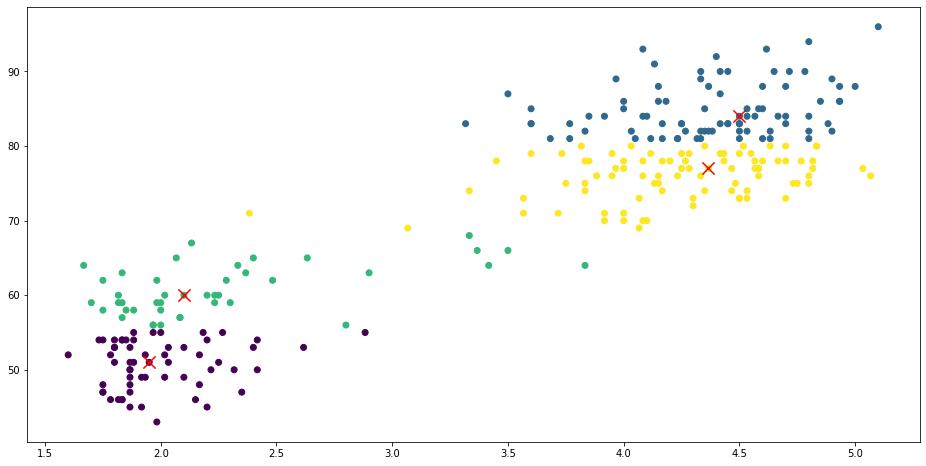

In [80]:
import matplotlib.pyplot as plt

# scattering the datapoints by clusters color coded 
# the centers are represented by red 'X'
plt.figure(figsize=(16,8))
plt.scatter(x[:,0] , x[:,1] , c = y_pred , alpha = 1)
for i in range(len(Centroids)):
    plt.scatter(x[Centroids[i],0] , x[Centroids[i],1] , marker = 'x' , color = 'red' , s = 150)

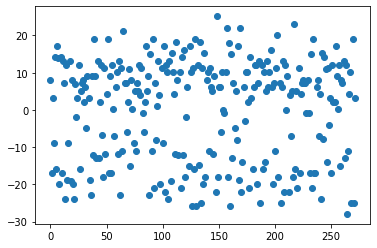

In [95]:
# first pca component
sorted_eigenval, sorted_eigenvec, x_transfomed = pca(x, 1)

plt.scatter(np.arange(0, len(x_transfomed)), x_transfomed)

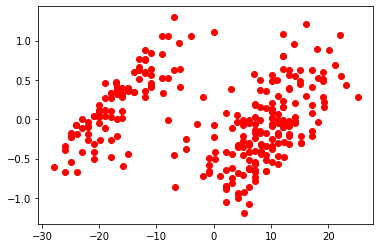

In [103]:
# secondd pca component
sorted_eigenval, sorted_eigenvec, x_transfomed = pca(x, 2)

plt.scatter(x_transfomed[:,0] , x_transfomed[:,1] , c= 'r')

when we had 2 components the data was clealry demonsterating that we have to clusters. however, when we had only 1 component the data was scattered rather abruptly and wasn't clear that the points represented 2 clusters. Hence, we added the second component and it was obvious that the data was divided into 2 classes / clusters 